In [1]:
import sys

sys.path.append("c:\\Users\\robin\\Documents\\HyperBrain")
sys.path.append("c:\\Users\\robin\\Documents\\HyperBrain\\source")

In [2]:
import torch
from source.visualization.evaluation_visualization import plot_precision_vs_threshold
from source.miscellaneous.evaluation import evaluate_test_image_pair, read_deformation, read_model_evaluation_metrics

In [3]:
deformation = read_deformation()

In [4]:
loftr_indoor_matches_image_1 = torch.load("../../models/baseline/loftr_indoor_matches_image_1.pt")
loftr_indoor_matches_image_2 = torch.load("../../models/baseline/loftr_indoor_matches_image_2.pt")
loftr_indoor_matches_confidence = torch.load("../../models/baseline/loftr_indoor_matches_confidence.pt")

loftr_outdoor_matches_image_1 = torch.load("../../models/baseline/loftr_outdoor_matches_image_1.pt")
loftr_outdoor_matches_image_2 = torch.load("../../models/baseline/loftr_outdoor_matches_image_2.pt")
loftr_outdoor_matches_confidence = torch.load("../../models/baseline/loftr_outdoor_matches_confidence.pt")

In [5]:
confidence_threshold_loftr = 0.8

loftr_indoor_matches_mask = loftr_indoor_matches_confidence > confidence_threshold_loftr
loftr_outdoor_matches_mask = loftr_outdoor_matches_confidence > confidence_threshold_loftr

loftr_indoor_matches_image_1 = loftr_indoor_matches_image_1[loftr_indoor_matches_mask]
loftr_indoor_matches_image_2 = loftr_indoor_matches_image_2[loftr_indoor_matches_mask]

loftr_outdoor_matches_image_1 = loftr_outdoor_matches_image_1[loftr_outdoor_matches_mask]
loftr_outdoor_matches_image_2 = loftr_outdoor_matches_image_2[loftr_outdoor_matches_mask]

In [6]:
(number_of_matches,
 average_distance,
 match_precision,
 auc,matches_per_patch,
 entropy) = evaluate_test_image_pair(loftr_indoor_matches_image_1, loftr_indoor_matches_image_2, deformation)

c:\Users\robin\Documents\HyperBrain\source\miscellaneous\evaluation.py:93: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen/native/BucketizationUtils.h:34.)
  x_indices = torch.searchsorted(x_borders, x_coords) - 1


In [7]:
auc

7.621774983972427

In [8]:
evaluation_metrics = read_model_evaluation_metrics(str("63"))

In [9]:
evaluation_metrics["match_precision"] = {float(key): value for key, value in evaluation_metrics["match_precision"].items()}


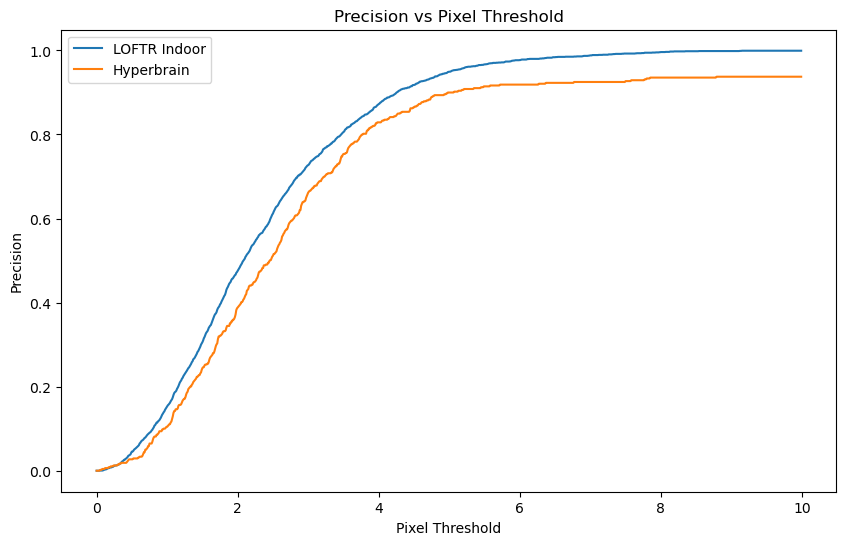

In [10]:
plot_precision_vs_threshold(match_precision, evaluation_metrics["match_precision"], labels=["LOFTR Indoor", "Hyperbrain"])

In [12]:
from skimage import io

In [13]:
img = io.imread("../../data/cyto_downscaled_3344_3904/B20_0432_Slice15_transformed.tif")    

In [15]:
img.shape

(3344, 3904)

In [16]:
import skimage

In [19]:
skimage.__version__

'0.22.0'